In [153]:
# CSC 484D Assignment #2
# Name: Jae Park
# V#: 00910464

import numpy as np
import IPython.display as ipd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

import random

In [154]:
srate = 44100      # sampling rate 


In [155]:
#2
def calculateComplex(complexNum1, complexNum2):
    realNum = (complexNum1[0] * complexNum2[0]) - (complexNum1[1] * complexNum2[1])
    imagNum = (complexNum1[0] * complexNum2[1]) + (complexNum1[1] * complexNum2[0])
    return [realNum, imagNum]
    
complexNum1 = [2, 1]
complexNum2 = [3, -4]

print(calculateComplex(complexNum1, complexNum2))

[10, -5]


In [156]:
#4
def create_sinusoid(amp, freq, duration, sample_rate, phase = 0.0):
    t = np.arange(0, duration, 1.0 / sample_rate)
    return amp * np.sin(2 * np.pi * freq * t + phase)

# random alplitudes for sinewaves
firstAmp = random.randint(0, 9) / 10
secondAmp = random.randint(0, 9) / 10
thridAmp = random.randint(1, 9) / 10

print('Acutal amplitude of first sinewave = %2.2f' % firstAmp)
print('Acutal amplitude of second sinewave = %2.2f' % secondAmp)
print('Acutal amplitude of third sinewave = %2.2f' % thridAmp)

firstSine = create_sinusoid(firstAmp, 100, 1, srate)
secondSine = create_sinusoid(secondAmp, 200, 1, srate)
thirdSine = create_sinusoid(thridAmp, 300, 1, srate)
combined = firstSine + secondSine + thirdSine;

Acutal amplitude of first sinewave = 0.80
Acutal amplitude of second sinewave = 0.60
Acutal amplitude of third sinewave = 0.50


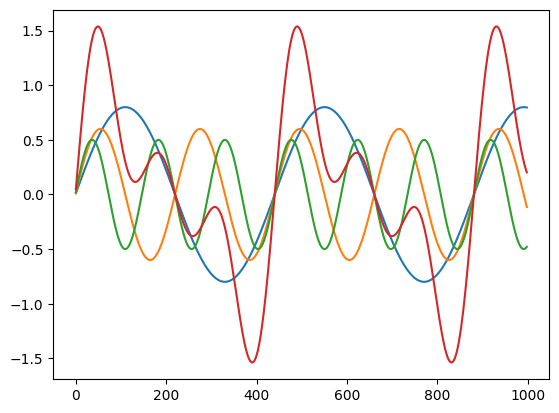

In [157]:
plt.figure() 
plt.plot(firstSine[1:1000])
plt.plot(secondSine[1:1000])
plt.plot(thirdSine[1:1000])
plt.plot(combined[1:1000])

In [158]:
def returnDotProduct(data1, data2): 
    dotProduct = np.dot(data1, data2)
    return 2 * (dotProduct / len(data1))

firstSineBase = create_sinusoid(1.0, 100, 1, srate)
secondSineBase = create_sinusoid(1.0, 200, 1, srate)
thirdSineBase = create_sinusoid(1.0, 300, 1, srate)

In [159]:
print('Dot product amplitude = %2.2f' % returnDotProduct(combined, firstSineBase))
print('Dot product amplitude = %2.2f' % returnDotProduct(combined, secondSineBase))
print('Dot product amplitude = %2.2f' % returnDotProduct(combined, thirdSineBase))

Dot product amplitude = 0.80
Dot product amplitude = 0.60
Dot product amplitude = 0.50


In [160]:
#5
# I used Kadenze code as a reference
# First method is to use the dot product of sin and cos components
phase = 0.25

firstSine = create_sinusoid(firstAmp, 100, 1, srate, 1.0)
secondSine = create_sinusoid(secondAmp, 200, 1, srate, phase)
thirdSine = create_sinusoid(thridAmp, 300, 1, srate, 3.0)
combined = firstSine + secondSine + thirdSine

In [161]:
# basis sin and cos waves
basis_sin = create_sinusoid(1.0, 200, 1, srate)
basis_cos = create_sinusoid(1.0, 200, 1, srate, np.pi / 2)

# tracking the second Sinewave with amplitude 
a = returnDotProduct(secondSine, basis_sin)
b = returnDotProduct(secondSine, basis_cos)
estimated_phase = np.arctan(b/a)
estimated_magnitude = np.sqrt(a*a+b*b)
print('Actual amplitude = %2.2f' % secondAmp)
print('Actual phase = %2.2f' % phase)
print("\n")
print('Estimated amplitude = %2.2f' % estimated_magnitude)
print('Estimated Phase = %2.2f' % estimated_phase)

Actual amplitude = 0.60
Actual phase = 0.25


Estimated amplitude = 0.60
Estimated Phase = 0.25


In [162]:
# Next approach is brute force search
def getAmpAndPhase(data1, srate):
    amplitude_estimates = np.zeros(srate)
    phases = range(-int(srate/2), int(srate/2))
    for k in phases: 
        data2 = create_sinusoid(1.0, 440, 0.02, 44100, phase = k * (2 * np.pi / srate))
        amplitude_estimates[k+int(srate/2)] = returnDotProduct(data1,data2)
    maxAmp = max(amplitude_estimates)
    maxAmpArr = np.where(amplitude_estimates == maxAmp)
    index = maxAmpArr[0][0]
    phaseEst = phases[index]
    print('Max Amplitude estimate = %2.2f' % maxAmp)
    print('Phase estimate = %2.2f' % phaseEst)
    
srate = 8000 
plt.figure()
data1 = create_sinusoid(3.0, 440, 0.02, 44100, phase = 0)
#data1 = create_sinusoid(440, 0.02,amp = 3.0, phase = 0)
getAmpAndPhase(data1, srate)
print('Actual amplitude = %2.2f' % 3)
print('Actual phase = %2.2f' % 0)
print("-------------------------------")

k = 1000
data1 = create_sinusoid(10.0, 440, 0.02, 44100, phase = 1000 * (2 * np.pi / srate))
#data1 = sinusoid(440, 0.02,amp = 10.0, phase = 1000 * (2 * np.pi / srate))
getAmpAndPhase(data1, srate)
print('Actual amplitude = %2.2f' % 10)
print('Actual phase = %2.2f' % k)
print("\n")

print("its not exact, but very close estimate. However, as it is brute-force method, it takes a long time")

Max Amplitude estimate = 3.01
Phase estimate = 21.00
Actual amplitude = 3.00
Actual phase = 0.00
-------------------------------
Max Amplitude estimate = 10.17
Phase estimate = 995.00
Actual amplitude = 10.00
Actual phase = 1000.00


its not exact, but very close estimate. However, as it is brute-force method, it takes a long time


<Figure size 640x480 with 0 Axes>

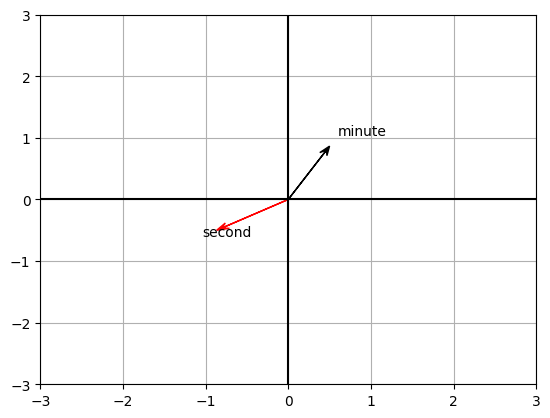

In [163]:
#8
# Takes a complex number as an input and convert that to clockhand display
# black arrow is minute, and red arrow is second
def complexToClock(time, xlim=[-3,3], ylim=[-3,3], linestyle='-'):
    
    minute = (np.pi / 2) - (np.pi/30) * (15 - np.real(time))
    second = (np.pi / 2) - (np.pi/30) * (15 - np.imag(time))
    plt.grid()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    
    plt.arrow(0, 0, np.sin(minute), np.cos(minute),
              head_width=0.1, fc="black", ec="black",
              overhang=0.5, length_includes_head=True)
    plt.text(np.sin(minute) * 1.2, np.cos(minute) * 1.2, "minute", size='10')
    plt.arrow(0, 0, np.sin(second), np.cos(second),
              head_width=0.1, fc="red", ec="red",
              overhang=0.5, length_includes_head=True)
    plt.text(np.sin(second) * 1.2, np.cos(second) * 1.2, "second", size='10')

# example
# minutes:5  seconds:40
time = 5 + 40j
complexToClock(time)


In [164]:
#12 Chiptune sound
# Sorry I am super creative when it comes to composing
def generate_triangle(freq, dur=1, amp=1.0, sr=44100):
    t = np.arange(0, dur, 1.0/sr)
    return 2 * (2*np.floor(freq*t) - np.floor(2*freq*t)) + 1

h1 = generate_triangle(110, dur=0.25)
h2 = generate_triangle(220, dur=0.25)
h3 = generate_triangle(330, dur=0.25)
h4 = generate_triangle(440, dur=0.25)
h5 = generate_triangle(550, dur=0.25)
h6 = generate_triangle(660, dur=0.25)
data = np.hstack([h1,h2,h1,h3,h3,h3,h4,h2,h2,h1])
ipd.Audio(data,rate=44100)